# Exercises

In [9]:
%pip install numpy matplotlib preliz

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import preliz as pz

# The Beta Distribution

![The Beta Distribution](The-Beta-Distribution.png)

$$
\begin{align}
E[\pi] &= \frac{\alpha}{\alpha + \beta}\\
E[\pi] \cdot (\alpha + \beta) &= \alpha\\
E[\pi] \cdot \alpha + E[\pi] \cdot \beta &= \alpha\\
E[\pi] \cdot \beta &= \alpha - E[\pi] \cdot \alpha\\
E[\pi] \cdot \beta &= \alpha (1 - E[\pi])\\
\frac{E[\pi]}{1 - E[\pi]} &= \frac{\alpha}{\beta}\\
\frac{E[\pi]}{1 - E[\pi]} \cdot \beta &= \alpha
\end{align}
$$

$$
\begin{align}
\alpha &= \frac{E[\pi]}{1 - E[\pi]} \cdot \beta\\
\alpha &= q \cdot \beta \quad \text{for } q = \frac{E[\pi]}{1 - E[\pi]}\\
\end{align}
$$

$$
\begin{align}
Var[\pi] &= \frac{\alpha\beta}{(\alpha+\beta)^2\;(\alpha+\beta+1)}\\
Var[\pi] & = \frac{q \cdot \beta \cdot \beta}{(q \cdot \beta + \beta)^{2} \cdot (q \cdot \beta + \beta + 1)}\\
Var[\pi] &= \frac{q \cdot \beta^{2}}{(q+1)^{2} \cdot \beta^{2} \cdot [(q+1) \cdot \beta + 1]}\\
Var[\pi] &= \frac{q}{(q+1)^{2} \cdot [(q+1) \cdot \beta + 1]}\\
[(q+1) \cdot \beta + 1] &= \frac{q}{(q+1)^{2} \cdot Var[\pi]}\\
(q+1) \cdot \beta &= \frac{q}{(q+1)^{2} \cdot Var[\pi]} - 1\\
\beta &= \left[ \frac{q}{(q+1)^{2} \cdot Var[\pi]} - 1 \right] : (q+1)\\
      &= \left[ \frac{q}{(q+1)^2 \cdot Var[\pi]} - 1 \right] \cdot \frac{1}{q+1}\\
      &= \frac{q}{(q+1)^3 \cdot Var[\pi]} - \frac{1}{q+1}
\end{align}
$$

# Beta Distribution Plot using PreliZ

<Axes: >

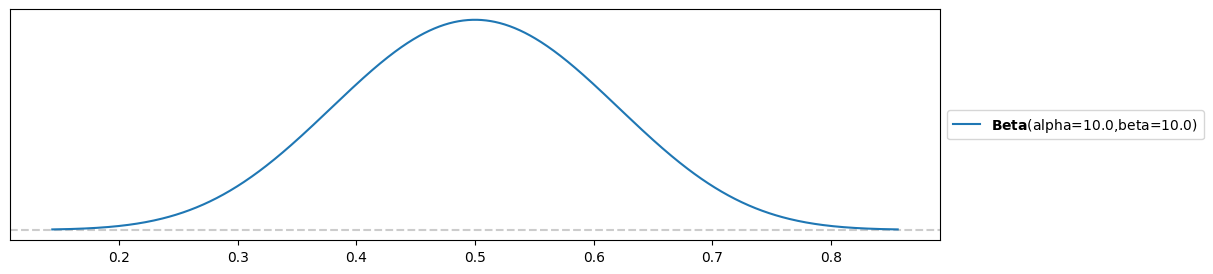

In [11]:
pz.Beta( 10, 10 ).plot_pdf( figsize=(12,3) )

# Exercise 1

Tune a $Beta(\alpha, \beta)$ model that accurately reflects the given prior information and visualize it.

**Hint:** Often you can constrain the possible values for $\alpha$ and $\beta$ using a given expectation or variance (see beta distribution's expectation or variance above).

$$
\begin{align}
E[\pi] &= \frac{\alpha}{\alpha + \beta}\\
E[\pi] \cdot (\alpha + \beta) &= \alpha\\
E[\pi] \cdot \alpha + E[\pi] \cdot \beta &= \alpha\\
E[\pi] \cdot \beta &= \alpha - E[\pi] \cdot \alpha\\
E[\pi] \cdot \beta &= \alpha (1 - E[\pi])\\
\frac{E[\pi]}{1 - E[\pi]} &= \frac{\alpha}{\beta}
\end{align}
$$

a) Your friend applied to a job and tells you: "I think I have a 40% chance of getting the job, but I'm pretty unsure". When pressed further, they put their chances between 20% and 60%.

$$
\begin{align}
\frac{\alpha}{\beta} &= \frac{0.4}{1 - 0.4}\\
\alpha &= \frac{0.4}{0.6} \cdot \beta\\
\alpha &= \frac{0.4}{0.6} \cdot \beta\\
\alpha &= \frac{2}{3} \cdot \beta
\end{align}
$$

<Axes: >

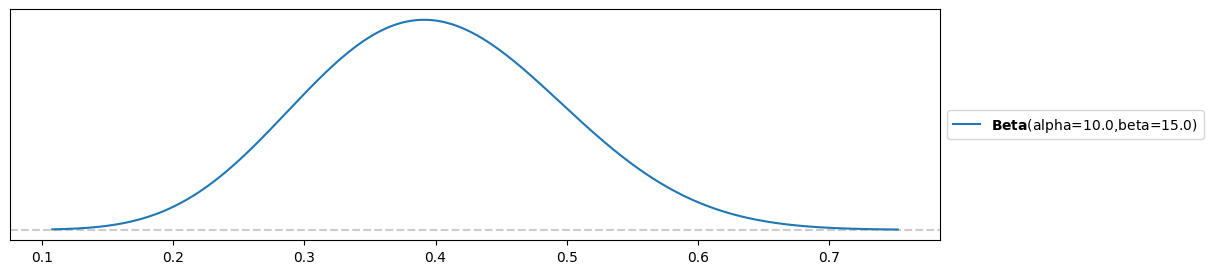

In [12]:
beta = 15
alpha = 2/3 * beta

pz.Beta(alpha, beta).plot_pdf(figsize=(12,3))

b) A scientist has created a new test for a rare disease. They expect that the test is accurate 80% of the time with a variance of $0.005$

$$
\begin{align}
\frac{\alpha}{\beta} &=\frac{E[\pi]}{1 - E[\pi]}\\
                    &= \frac{0.8}{1-0.8}\\
\alpha &= \frac{0.8}{0.2} \cdot \beta\\
\alpha &= 4\beta
\end{align}
$$

$$
\begin{align}
Var[\pi] &= \frac{\alpha\beta}{(\alpha + \beta)^2 \cdot (\alpha + \beta + 1)}\\
         &= \frac{4\beta \cdot \beta}{(4\beta + \beta)^{2} (4\beta + \beta + 1)}\\
         &= \frac{4\beta^{2}}{(5\beta)^{2} \cdot (5\beta + 1)}\\
         &= \frac{4\beta^2}{25\beta^{2} \cdot (5\beta + 1)}\\
         &= \frac{4}{25 \cdot (5\beta + 1)}\\
         &= \frac{4}{125\beta + 25}\\
\\
0.005 &= \frac{4}{125\beta + 25}\\
(125\beta + 25) * 0.005 &= 4\\
\beta &= \left[ \frac{4}{0.005} - 25 \right] : 125\\
      &= 6.2\\
\end{align}
$$

<Axes: >

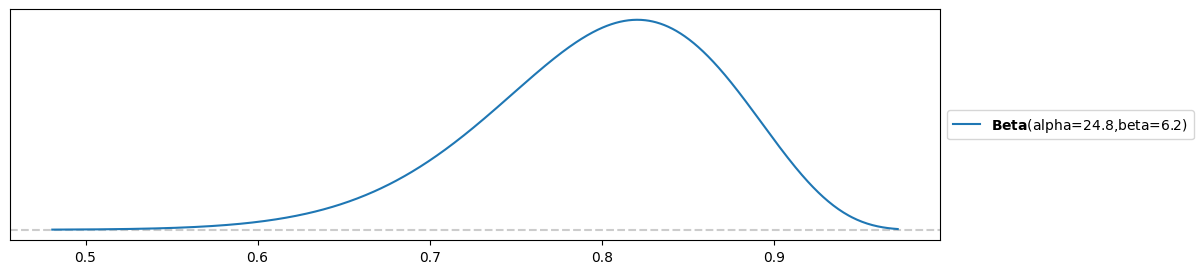

In [13]:
beta = 6.2
alpha = 4 * beta

pz.Beta(alpha, beta).plot_pdf(figsize=(12, 3))

c) Another scientist in the same field claims that he expects the same accuracy, however ten times larger variance of $0.05$. Can the beta distribution model this prior expectation as well?

<Axes: >

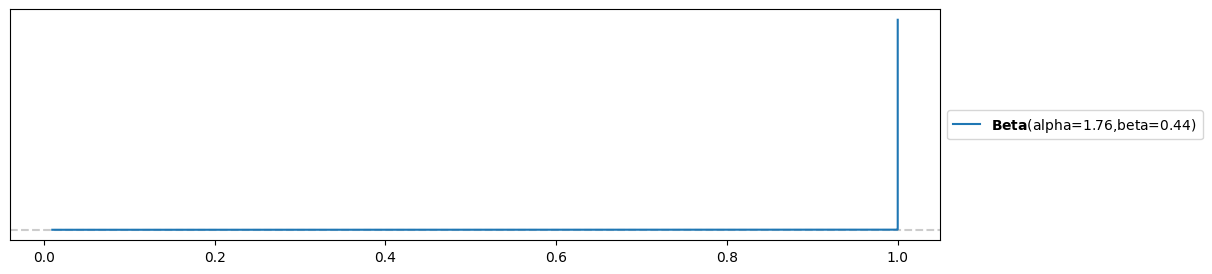

In [14]:
beta = (4 / 0.05 - 25) / 125
alpha = 4 * beta

pz.Beta(alpha, beta).plot_pdf(figsize=(12, 3))

Nope! The beta distribution is unable to model this prior expectation. We would need to use something else for this task.

d) Your Aunt Jo is a successful mushroom hunter. She boasts: I expect to find enough mushrooms to feed myself and my co-workers at the auto-repair shop 90% of the time, but if I had to give you a likely range it would be between 85% and 100% of the time".

Given:

$$
\begin{align}
\mathbb{E}[\pi] &= 0.9\\
\sigma &= \frac{1.0 - 0.85}{2} = 0.075\\
\mathrm{Var}[\pi] &=\sigma^2 = 0.075^2 = 0.005625
\end{align}
$$

Then:

$$
\begin{align}
\frac{\alpha}{\beta} &= \frac{\mathbb{E}[\pi]}{1-\mathbb{E}[\pi]} = \frac{0.9}{0.1} \\
\alpha &= \frac{0.9}{0.1} \cdot \beta\\
\alpha &= 9 \cdot \beta
\end{align}
$$

$$
\begin{align}
\mathrm{Var}[\pi] &= \frac{\alpha \cdot \beta}{(\alpha + \beta)^{2} \cdot (\alpha + \beta + 1)}\\
0.005625 &= \frac{9\beta \cdot \beta}{(9\beta + \beta)^{2} \cdot (9\beta + \beta + 1)} = \frac{9\beta^{2}}{10^{2} \cdot \beta^{2} \cdot (10\beta + 1)}\\
0.005625 & = \frac{9}{10^{3} \cdot \beta + 10^{2}}\\
0.005625 &= \frac{9}{10^{3} \beta + 10^{2}}\\
10^{3} \beta + 10^{2} &= \frac{9}{0.005625}\\
10^{3} \beta &= \frac{9}{0.005625} + 10^{2}\\
\beta &= [\frac{9}{0.005625} + 100] : 10^{3} = 1.7
\end{align}
$$

<Axes: >

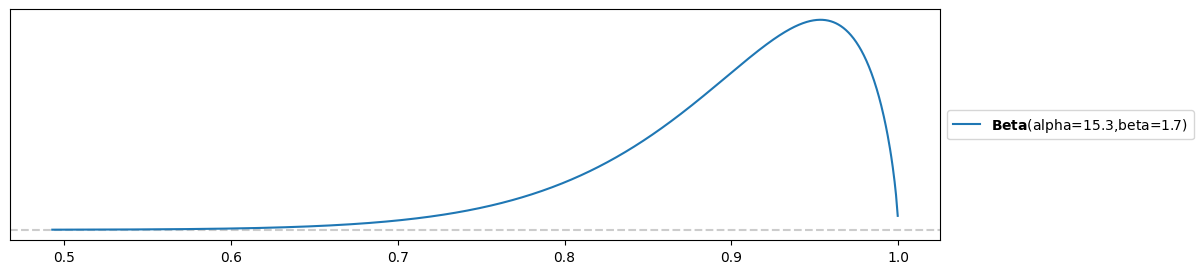

In [15]:
beta = 1.7
alpha = 9 * beta

pz.Beta(alpha, beta).plot_pdf(figsize=(12, 3))

e) Sal (who is a touch hyperbolic) just interviewed for a job, and doesn't know how to describe their chances of getting an offer. The say, "I couldn't read my interviewer's expression! I either really impressed them and the are absolutely going to hiere me, or I made a terrible impression and they are burning my resumé as we speak.

This calls for a beta distribution with $\alpha, \beta < 1$ !

<Axes: >

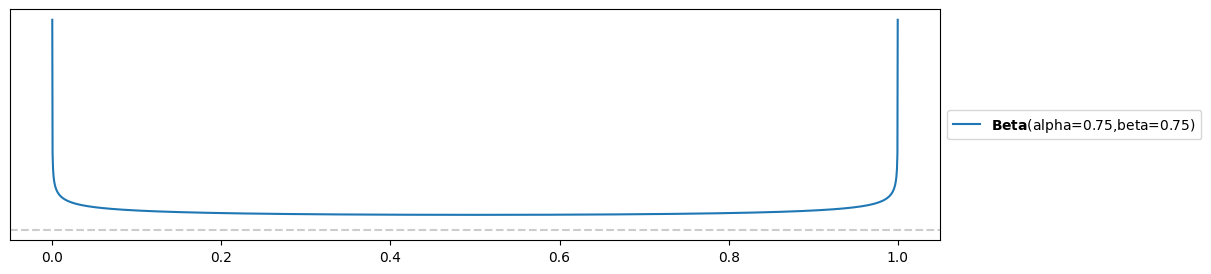

In [16]:
pz.Beta(0.75, 0.75).plot_pdf(figsize=(12,3))

# Exercise 2

$$
\begin{align}
\alpha &= \frac{E[\pi]}{1-E[\pi]} \cdot \beta \\
Var[\pi] &= \frac{\alpha \cdot \beta}{(\alpha + \beta)^{2} \cdot (\alpha + \beta + 1)}\\
\end{align}
$$

a) I would choose the Beta-binominal conjugate family because we are dealing with a binary problem here.

Priors of Heidi:

$$
\begin{align}
E[\pi_{Heidi}] &= 0.1\\
\sigma_{Heidi} &= \frac{0.1}{2} = 0.05\\
Var[\pi_{Heidi}] &= (\sigma_{Heidi})^2 = 0.0025\\
\end{align}
$$

$$
\begin{align}
\alpha_{Heidi} &= \frac{0.1}{1-0.1} \cdot \beta_{Heidi} = \frac{1}{9} \cdot \beta_{Heidi}\\
q_{Heidi} &= \frac{1}{9}\\
\beta_{Heidi} &= \frac{q}{(q+1)^3*Var[\pi_{Heidi}]} - \frac{1}{q+1}\\
&= \frac{\frac{1}{9}}{(\frac{1}{9}+1)^3*0.0025} - \frac{1}{\frac{1}{9}+1}\\
&= 31.5
\end{align}
$$

<Axes: >

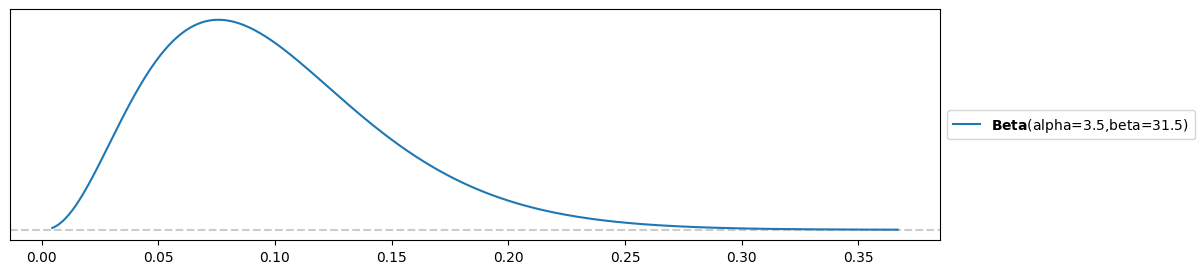

In [17]:
beta_heidi = 31.5
alpha_heidi = 1/9 * beta_heidi

pz.Beta(alpha_heidi, beta_heidi).plot_pdf(figsize=(12,3))

and Peter. Because he is less sure, we'll just assume $\sigma_{Peter} = 2 * \sigma_{Heidi}$:

$$
\begin{align}
E[\pi_{Peter}] &= 0.5\\
\sigma_{Peter} &= \frac{0.20}{2} = 0.1\\
Var[\pi_{Peter}] &= (\sigma_{Peter})^2 = 0.01\\
\alpha_{Peter} &= \frac{E[\pi_{Peter}]}{1 - E[\pi_{Peter}]} \cdot \beta_{Peter}\\
               &= 1 \cdot \beta_{Peter}\\
q_{Peter} &= \frac{1}{1} = 1\\
\beta_{Peter} &= \frac{q}{(q+1)^3*Var[\pi_{Peter}]} - \frac{1}{q+1}\\
&= \frac{1}{(1+1)^3*0.01} - \frac{1}{1+1}\\
&= \frac{1}{8*0.01} - \frac{1}{2}\\
&= 12
\end{align}
$$

<Axes: >

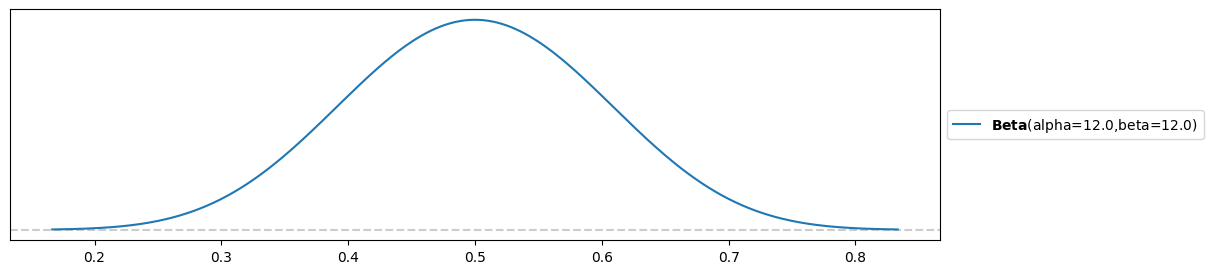

In [18]:
beta_peter = 12
alpha_peter = beta_peter

pz.Beta(alpha_peter, beta_peter).plot_pdf(figsize=(12,3))

b) Compute the parameters of Heidi and Peter's posterior distributions if Peter is the onluy one out of 6 people who mixes their apple puré with the rest. How do their opinions change in the light of the data? Compare their prior distributions.

**Heidi's change in belief**

Prior (mean = 0.1000
Post (mean = 0.1098)


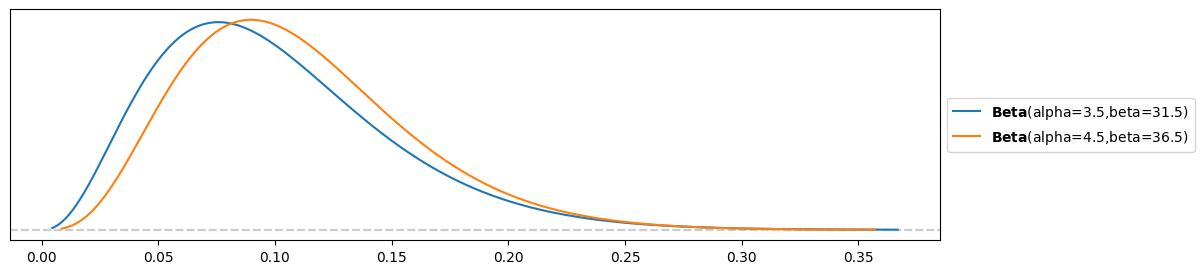

In [19]:
n = 6
k = 1

post_alpha_heidi = alpha_heidi + k
post_beta_heidi = beta_heidi + n - k

prior_heidi = pz.Beta(alpha_heidi, beta_heidi)
post_heidi = pz.Beta(post_alpha_heidi, post_beta_heidi)

prior_heidi.plot_pdf(figsize=(12, 3))
print(f"Prior (mean = {prior_heidi.mean():.4f}")
post_heidi.plot_pdf(figsize=(12, 3))
print(f"Post (mean = {post_heidi.mean():.4f})")

**Peter's change in belief**

Prior (mean = 0.5000)
Post (mean = 0.4333)


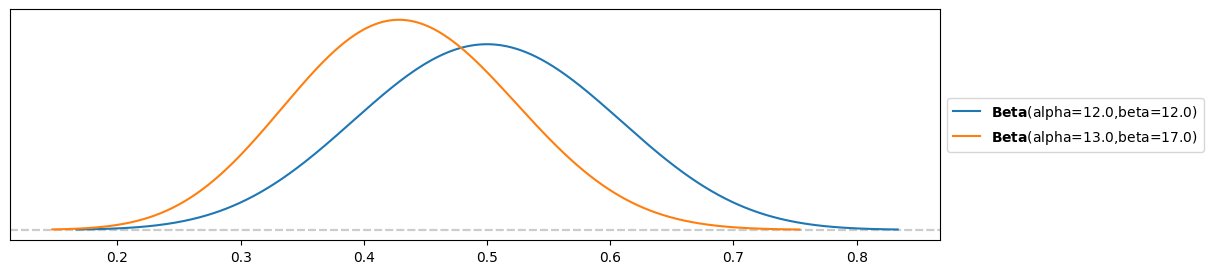

In [20]:
n = 6
k = 1

post_alpha_peter = alpha_peter + k
post_beta_peter = beta_peter + n - k

prior_peter = pz.Beta(alpha_peter, beta_peter)
post_peter = pz.Beta(post_alpha_peter, post_beta_peter)

prior_peter.plot_pdf(figsize=(12, 3))
print(f"Prior (mean = {prior_peter.mean():.4f})")
post_peter.plot_pdf(figsize=(12, 3))
print(f"Post (mean = {post_peter.mean():.4f})")

c) How much would it change for Heidi's posterior opinion if instead of just Peter all of the 6 participants would have mixed? Could Peter convince here with this data? If no, how many people would they have needed to be (all mixing) to increase the expectation of Heidi's opinion to at least 50%?

Prior: 0.1000
Post (6 choose 0, mean = 0.0854)
Post (6 choose 1, mean = 0.1098)
Post (6 choose 2, mean = 0.1341)
Post (6 choose 3, mean = 0.1585)
Post (6 choose 4, mean = 0.1829)
Post (6 choose 5, mean = 0.2073)
Post (6 choose 6, mean = 0.2317)


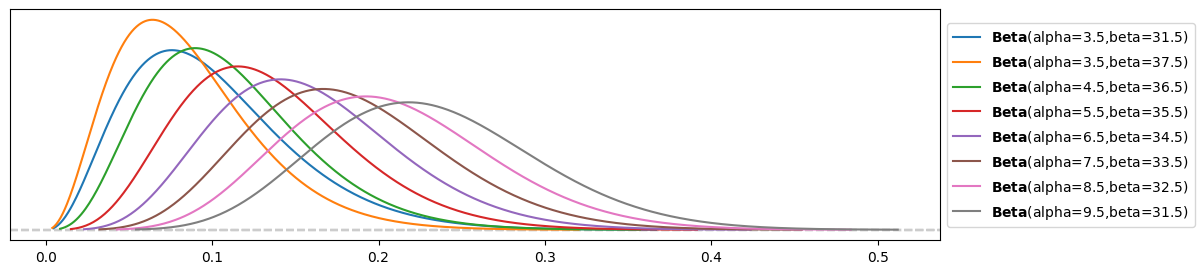

In [21]:
n = 6
k = 1

prior_heidi = pz.Beta(alpha_heidi, beta_heidi)
prior_heidi.plot_pdf(figsize=(12, 3))
print(f"Prior: {prior_heidi.mean():.4f}")

for k in range(n+1):
    post_alpha_heidi = alpha_heidi + k
    post_beta_heidi = beta_heidi + n - k

    post_heidi = pz.Beta(post_alpha_heidi, post_beta_heidi)
    post_heidi.plot_pdf(figsize=(12, 3))
    print(f"Post ({n} choose {k}, mean = {post_heidi.mean():.4f})")

Heidi is not convinced: Even if all 6/6 participants would mix, she would still believe that approximately 23.17% out of all people mix apple puré.

In [ ]:
prior_heidi = pz.Beta(alpha_heidi, beta_heidi)
prior_heidi.plot_pdf(figsize=(12, 3), legend=f"Prior: {prior_heidi.mean():.4f}")

mean = prior_heidi.mean()

n = 1
k = 1

while mean < 0.5:
    post_alpha_heidi = alpha_heidi + k
    post_beta_heidi = beta_heidi + n - k

    post_heidi = pz.Beta(post_alpha_heidi, post_beta_heidi)
    mean = post_heidi.mean()

    post_heidi.plot_pdf(figsize=(12, 3))
    print(f"Post ({n} choose {k}, mean = {mean:.4f})")

    if k == n:
        n += 1
        k = 1
    elif k < n:
        k += 1

Post (1 choose 1, mean = 0.1250)
Post (2 choose 1, mean = 0.1216)
Post (2 choose 2, mean = 0.1486)
Post (3 choose 1, mean = 0.1184)
Post (3 choose 2, mean = 0.1447)
Post (3 choose 3, mean = 0.1711)
Post (4 choose 1, mean = 0.1154)
Post (4 choose 2, mean = 0.1410)
Post (4 choose 3, mean = 0.1667)
Post (4 choose 4, mean = 0.1923)
Post (5 choose 1, mean = 0.1125)
Post (5 choose 2, mean = 0.1375)
Post (5 choose 3, mean = 0.1625)
Post (5 choose 4, mean = 0.1875)
Post (5 choose 5, mean = 0.2125)
Post (6 choose 1, mean = 0.1098)
Post (6 choose 2, mean = 0.1341)
Post (6 choose 3, mean = 0.1585)
Post (6 choose 4, mean = 0.1829)
Post (6 choose 5, mean = 0.2073)
Post (6 choose 6, mean = 0.2317)
Post (7 choose 1, mean = 0.1071)
Post (7 choose 2, mean = 0.1310)
Post (7 choose 3, mean = 0.1548)
Post (7 choose 4, mean = 0.1786)
Post (7 choose 5, mean = 0.2024)
Post (7 choose 6, mean = 0.2262)
Post (7 choose 7, mean = 0.2500)
Post (8 choose 1, mean = 0.1047)
Post (8 choose 2, mean = 0.1279)
Post (8 ch

It would need 28/28 participants who would mix to change the believe of Heidi such that she thinks 50% of all people mix their puré.

# Exercise 3

![Beta-Mean](./Exercise-3a.png)

![Beta-as-Weighted-Sum-Part1](./Exercise-3b1.png)
![Beta-as-Weighted-Sum-Part2](./Exercise-3b2.png)